<a href="https://colab.research.google.com/github/RanxduG/Sri-Lanka-Formaldehyde-Level-Analysis/blob/main/Matara_HCHO_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING GENERAL LIBRARIES**

In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive

#**LOADING DATASET**


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Matara_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/matara_joined_data.csv')


#**PREPARING DATASET FOR ANAYSIS**


In [4]:
# Assuming 'date' column is in string format
Matara_data['date'] = pd.to_datetime(Matara_data['date'])


In [5]:
Matara_data.set_index('date', inplace=True)

In [6]:
Matara_data.rename(columns={'HCHO reading': 'HCHO_reading'}, inplace=True)

#**DESCRIBING DATA**


In [7]:
Matara_data.head()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO_reading,Location,Current Date,Next Date,month
date,,,,,,,,,,,,,,,
2019-01-01,26.30,26.79,16.48,77.38,0.27,100.72,5.20,53.38,6.52,52.19,0.000113,"Deniyaya, Matara",2019-01-01,2019-01-02,2019-01
2019-01-02,25.80,26.57,15.93,77.19,0.06,100.71,4.34,57.06,5.40,55.88,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03,2019-01
2019-01-03,25.96,26.52,15.44,74.12,0.03,100.74,3.91,49.12,4.91,47.38,0.000236,"Deniyaya, Matara",2019-01-03,2019-01-04,2019-01
2019-01-04,25.76,26.31,15.32,74.44,0.02,100.71,4.08,47.50,5.18,46.12,0.000064,"Deniyaya, Matara",2019-01-04,2019-01-05,2019-01
2019-01-05,26.15,26.55,16.48,78.12,0.09,100.58,3.45,55.19,4.50,54.31,0.000053,"Deniyaya, Matara",2019-01-05,2019-01-06,2019-01


In [8]:
Matara_data.describe()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO_reading
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,27.182163,27.501944,18.729255,82.941687,6.790816,100.281566,4.859989,192.763647,6.027021,192.782065,0.000094
std,0.706855,0.748417,1.135525,4.007123,8.430701,0.151895,1.870973,81.986242,2.359842,82.902385,0.000062
min,24.840000,25.280000,13.550000,63.940000,0.000000,99.790000,1.130000,29.560000,1.320000,28.690000,0.000000
25%,26.702500,27.000000,18.250000,80.810000,1.210000,100.180000,3.312500,99.812500,4.082500,99.515000,0.000064
50%,27.150000,27.420000,18.860000,83.690000,4.075000,100.280000,4.850000,236.030000,6.065000,237.000000,0.000085
75%,27.630000,27.907500,19.470000,85.880000,9.145000,100.380000,6.335000,258.362500,7.910000,259.060000,0.000117
max,29.260000,30.210000,21.610000,91.940000,77.440000,100.780000,10.600000,327.810000,13.050000,329.810000,0.000445


In [9]:
features_to_remove = ['Location',	'Current Date', 	'Next Date', 	'month']
Matara_data = Matara_data.drop(features_to_remove, axis=1)

#**CHECKING EACH COLUMN OF DATA**


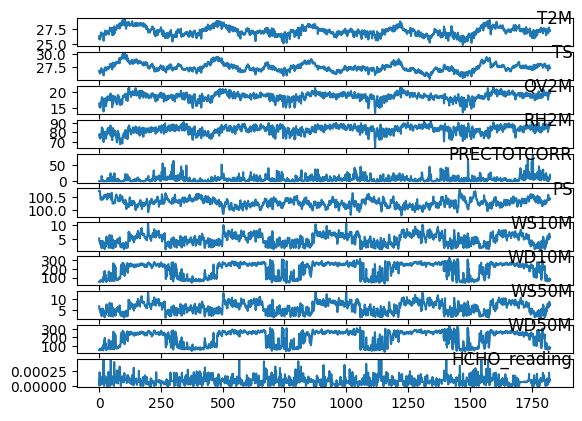

In [11]:
from matplotlib import pyplot as plt

values = Matara_data.values
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(Matara_data.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

#**HCHO READING VS DATE**


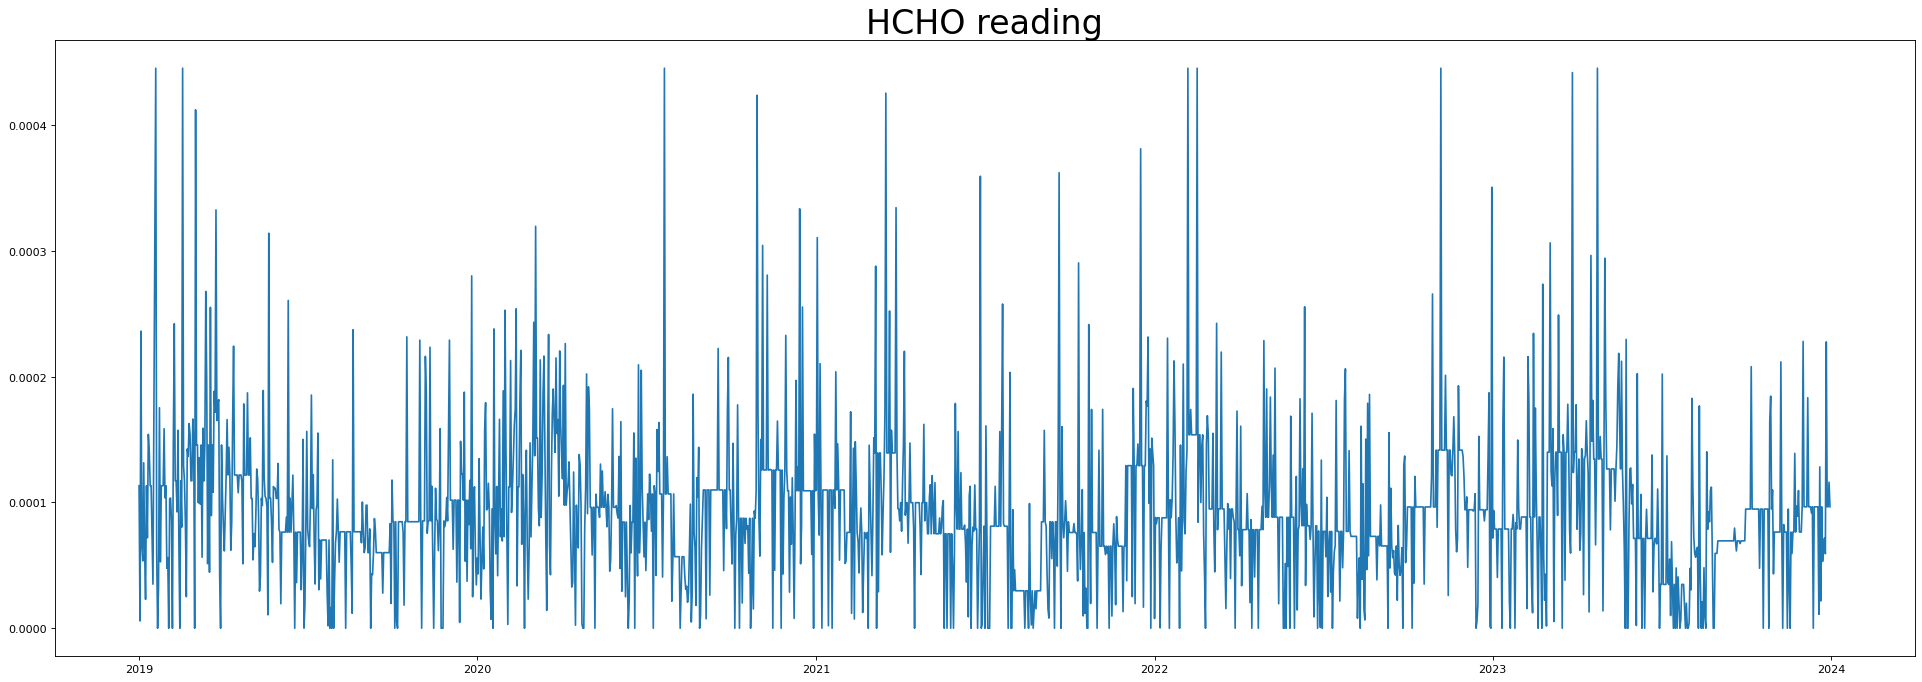

In [12]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('HCHO reading', fontsize=30)

plt.plot(Matara_data.HCHO_reading)

#**USING SEASONAL DECOMPOSE TO IDENTIFY TREND AND SEASONALITY**


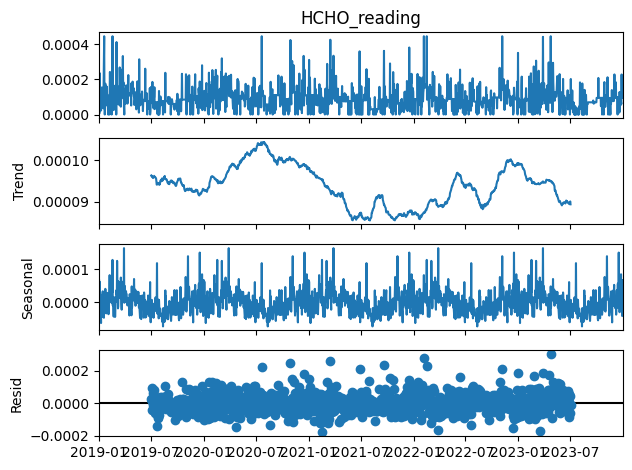

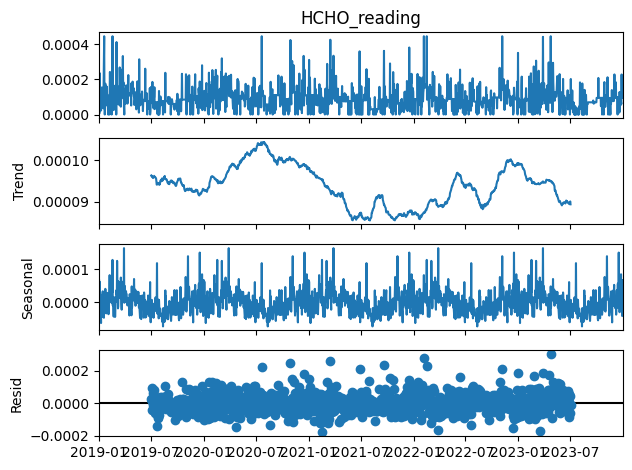

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = Matara_data.HCHO_reading
result = seasonal_decompose(series, model='additive', period=365)
result.plot()

#**PLOTING HCHO ROLLING MEAN AND ROLLING STANDARD DEVIATION (WINDOW=30)**


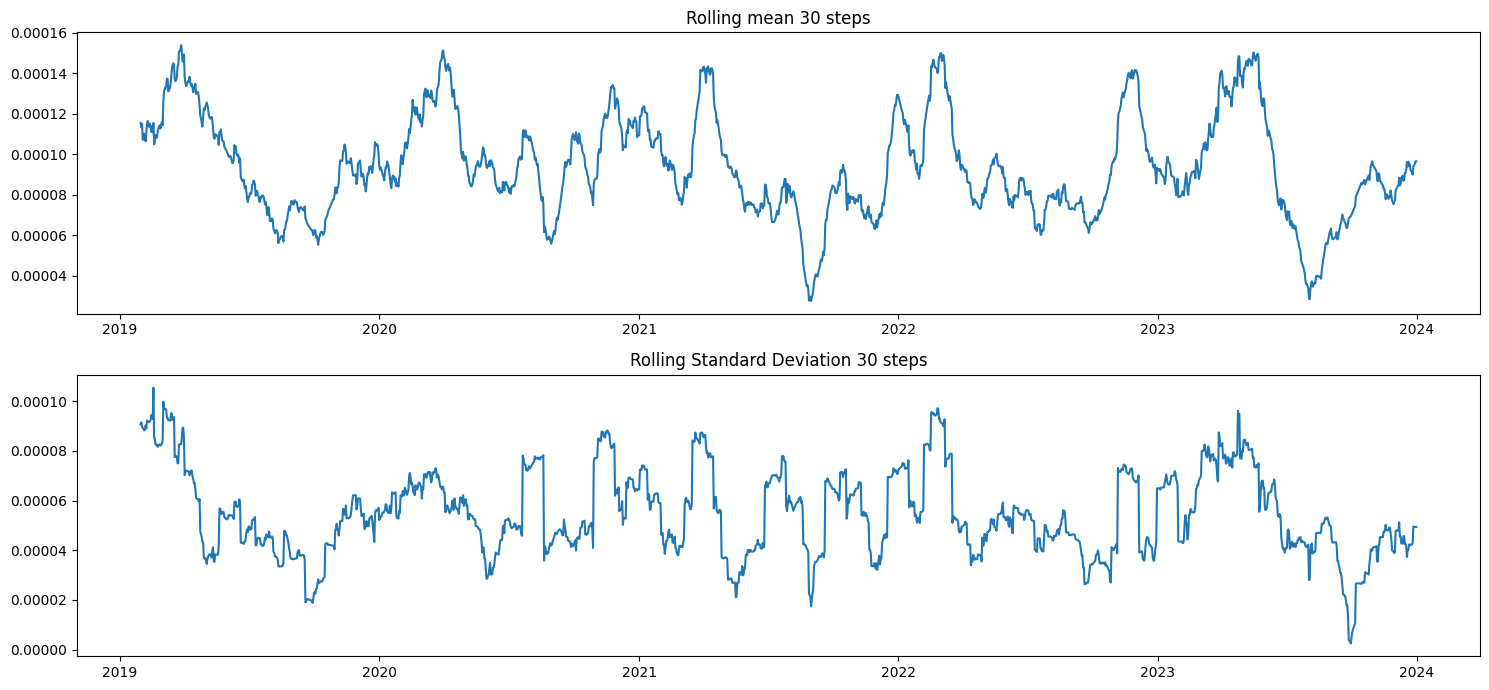

In [14]:
import numpy as np

fig = plt.figure(figsize=(15, 7))
layout = (2, 2)
mv_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
std_ax = plt.subplot2grid(layout, (1, 0), colspan=2)

mm = Matara_data.HCHO_reading.rolling(30).mean()
mv_ax.plot(mm)
mv_ax.set_title("Rolling mean 30 steps")

std = Matara_data.HCHO_reading.rolling(30).std()
std_ax.plot(std)
std_ax.set_title("Rolling Standard Deviation 30 steps")

plt.tight_layout()

#**HCHO WEEKLY MEAN VS DATE**


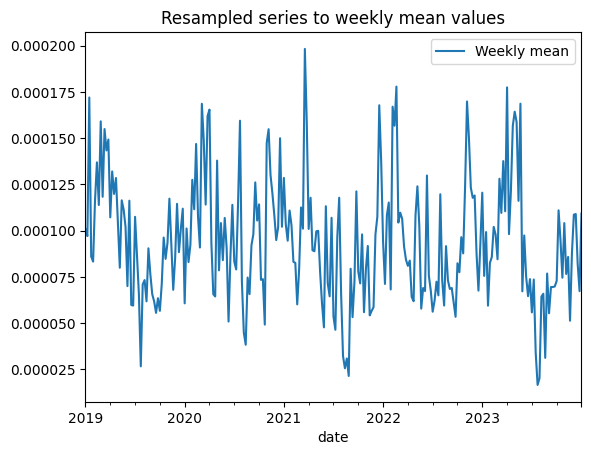

In [15]:
# Looking for weekly seasonality
resample = Matara_data.resample('W')
weekly_mean = resample.mean()
weekly_mean.HCHO_reading.plot(label='Weekly mean')
plt.title("Resampled series to weekly mean values")
plt.legend()

#**POLYNOMIAL FIT**


/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-16-ec2b34b41b29>:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(X, y, degree)


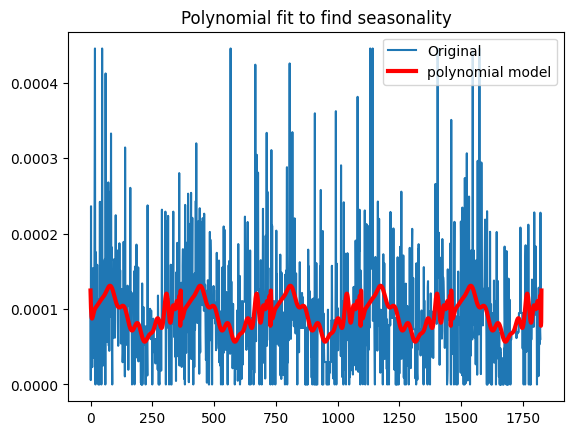

In [16]:
# Fix xticks to show dates
# fit polynomial: x^2*b1 + x*b2 + ... + bn
series = Matara_data.HCHO_reading.values
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100
coef = np.polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

#**FINDING NOISE**


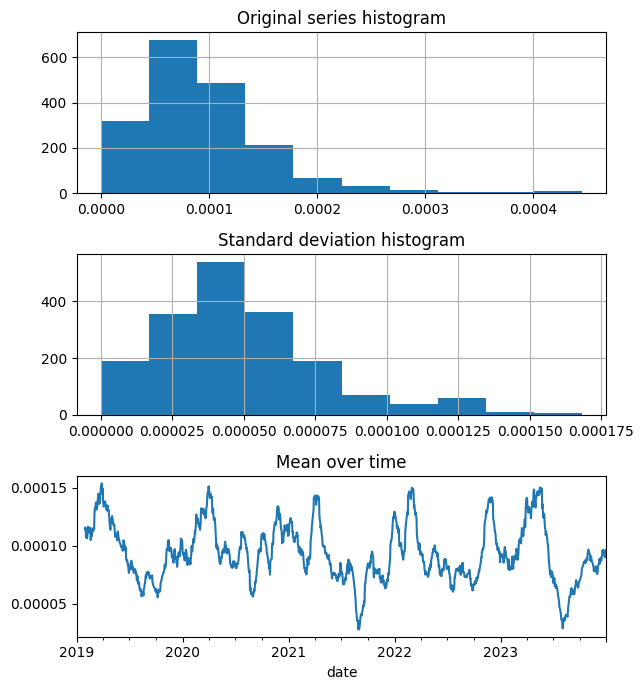

In [17]:
fig = plt.figure(figsize=(12, 7))
layout = (3, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
hist_std_ax = plt.subplot2grid(layout, (1, 0))
mean_ax = plt.subplot2grid(layout, (2, 0))

Matara_data.HCHO_reading.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

mm = Matara_data.HCHO_reading.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = Matara_data.HCHO_reading.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")
plt.tight_layout()

#**PAC & AC PLOTS**


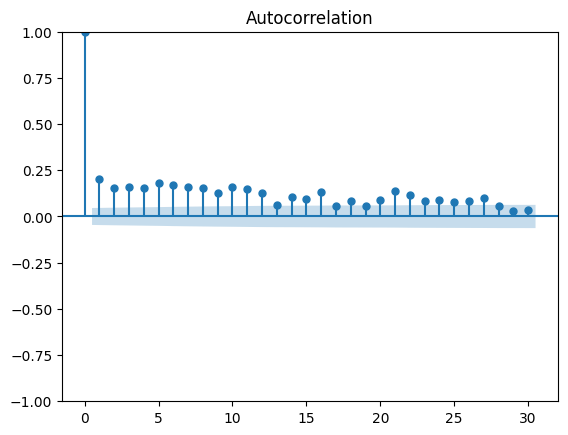

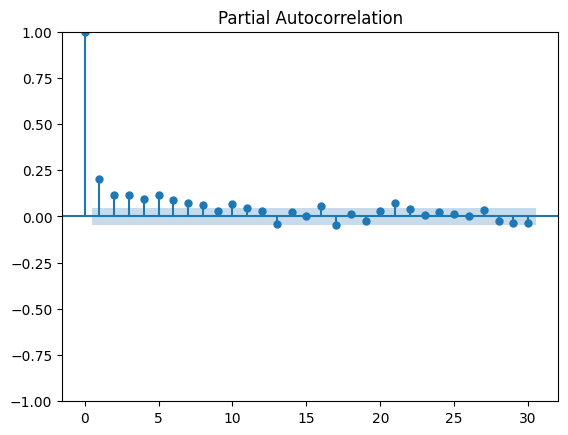

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series, lags=30)
plot_pacf(series, lags=30)
plt.show()

#**ADF TEST**


In [19]:
from statsmodels.tsa.stattools import adfuller

X = Matara_data.HCHO_reading.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.588570
p-value: 0.000001
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
